# AH2179 Applied Artificial Intelligence in Transportation Project assignment: Traffic flow short-term prediction
### By Algot Sjöholm, Linnea Eriksson and Jennifer Malmgren

## Setup

In [1]:
#!pip install tensorflow

In [2]:
# Imports
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import joblib
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Connect to Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Set your own project path
project_path = '/content/gdrive/MyDrive/Samhällsbyggnadsprogrammet/AH2179/Project/'

In [5]:
# Get the training dataset
train_df = pd.read_csv(project_path+'preprocessingV5.csv',sep=';')
train_df

,PORTAL,Date,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
0,"E4S 55,620",2021-06-01,240,29.0,21.683103,543.0,NaN,NaN,NaN,22.103757,NaN,NaN,NaN,1,8
1,"E4S 55,620",2021-06-01,241,26.0,21.933077,581.0,NaN,NaN,NaN,21.917539,NaN,NaN,NaN,1,8
2,"E4S 55,620",2021-06-01,242,38.0,21.563684,598.0,NaN,NaN,NaN,21.891789,NaN,NaN,NaN,1,8
3,"E4S 55,620",2021-06-01,243,34.0,22.681176,621.0,NaN,NaN,NaN,21.755459,NaN,NaN,NaN,1,8
4,"E4S 55,620",2021-06-01,244,29.0,23.126552,632.0,156.0,NaN,NaN,21.609209,22.181538,NaN,NaN,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604021,"E4S 58,140",2021-12-31,596,19.0,21.507895,NaN,95.0,280.0,921.0,NaN,21.472737,21.614643,21.644093,0,19
604022,"E4S 58,140",2021-12-31,597,28.0,20.806071,NaN,108.0,293.0,940.0,NaN,21.198426,21.522355,21.626894,0,19
604023,"E4S 58,140",2021-12-31,598,23.0,21.352609,NaN,113.0,300.0,953.0,NaN,21.110973,21.543433,21.614586,0,19
604024,"E4S 58,140",2021-12-31,599,19.0,21.491579,NaN,120.0,306.0,953.0,NaN,21.231500,21.563007,21.621857,0,19


In [6]:
# Get the full evaluation dataset
eval_df = pd.read_csv(project_path+'evalpreproV3.csv',sep=';')
eval_df

,PORTAL,Date,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
0,"E4S 55,620",2022-01-05,240,7.0,20.242857,111.0,NaN,NaN,NaN,21.036216,NaN,NaN,NaN,1,8
1,"E4S 55,620",2022-01-05,241,3.0,21.000000,114.0,NaN,NaN,NaN,20.899211,NaN,NaN,NaN,1,8
2,"E4S 55,620",2022-01-05,242,3.0,20.100000,119.0,NaN,NaN,NaN,20.891849,NaN,NaN,NaN,1,8
3,"E4S 55,620",2022-01-05,243,3.0,21.466667,124.0,NaN,NaN,NaN,20.885242,NaN,NaN,NaN,1,8
4,"E4S 55,620",2022-01-05,244,6.0,20.920000,131.0,22.0,NaN,NaN,20.931450,20.678182,NaN,NaN,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249834,"E4S 58,140",2022-06-30,596,47.0,21.366596,NaN,281.0,926.0,3480.0,NaN,20.819858,20.710724,20.960713,1,19
249835,"E4S 58,140",2022-06-30,597,46.0,21.418696,NaN,274.0,913.0,3478.0,NaN,20.984270,20.703297,20.965043,1,19
249836,"E4S 58,140",2022-06-30,598,57.0,21.047895,NaN,257.0,899.0,3466.0,NaN,21.149767,20.778687,20.971971,1,19
249837,"E4S 58,140",2022-06-30,599,48.0,20.967917,NaN,252.0,887.0,3453.0,NaN,21.103929,20.793563,20.974193,1,19


In [7]:
# Get the full evaluation dataset
peak_eval_df = pd.read_csv(project_path+'peakevalpreproV2.csv',sep=';')
peak_eval_df

,PORTAL,Date,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
0,"E4S 55,620",2022-01-05,451,34.0,20.723529,535.0,183.0,528.0,2264.0,19.667645,19.924590,19.637822,19.783167,1,15
1,"E4S 55,620",2022-01-05,452,39.0,19.423846,542.0,194.0,535.0,2263.0,19.636033,19.861907,19.577645,19.760420,1,15
2,"E4S 55,620",2022-01-05,453,44.0,18.888636,532.0,195.0,550.0,2264.0,19.726297,19.685436,19.528818,19.752407,1,15
3,"E4S 55,620",2022-01-05,454,35.0,19.148571,535.0,193.0,541.0,2260.0,19.648710,19.564974,19.529261,19.732009,1,15
4,"E4S 55,620",2022-01-05,455,38.0,19.536842,524.0,190.0,549.0,2261.0,19.717195,19.504368,19.555647,19.708859,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41545,"E4S 58,140",2022-06-30,506,66.0,21.448182,919.0,330.0,946.0,3768.0,21.302590,21.522667,21.300666,21.365154,1,16
41546,"E4S 58,140",2022-06-30,507,50.0,20.661600,933.0,302.0,959.0,3760.0,21.347824,21.233344,21.265068,21.355133,1,16
41547,"E4S 58,140",2022-06-30,508,77.0,19.574805,921.0,317.0,970.0,3780.0,21.481379,21.013943,21.180227,21.318696,1,16
41548,"E4S 58,140",2022-06-30,509,49.0,22.113673,944.0,304.0,944.0,3757.0,21.406324,21.037599,21.176419,21.330000,1,16


In [8]:
# Check the correlation of the parameters
flow_corr = train_df.drop(['PORTAL', 'Date'], axis=1).corr()
flow_corr['FLOW_NEXT_15_SUM'].sort_values(ascending=False)

,FLOW_NEXT_15_SUM
FLOW_NEXT_15_SUM,1.000000
FLOW_PREV_5_SUM,0.970752
FLOW_PREV_15_SUM,0.969744
FLOW_PREV_60_SUM,0.942067
FLOW_SUM,0.934115
IS_WEEKDAY,0.554390
Interval_1,0.471476
Interval_30,0.468998
SPEED_WEIGHTED_AVG,-0.436948
SPEED_PREV_5_AVG,-0.471512


In [9]:
speed_corr = train_df.drop(['PORTAL', 'Date'], axis=1).corr()
speed_corr['SPEED_NEXT_15_AVG'].sort_values(ascending=False)

,SPEED_NEXT_15_AVG
SPEED_NEXT_15_AVG,1.000000
SPEED_PREV_5_AVG,0.916691
SPEED_PREV_15_AVG,0.910538
SPEED_PREV_60_AVG,0.869657
SPEED_WEIGHTED_AVG,0.862570
IS_WEEKDAY,-0.258297
Interval_30,-0.351685
Interval_1,-0.353020
FLOW_SUM,-0.478672
FLOW_NEXT_15_SUM,-0.501116


In [10]:
# Create a function to retain all necessary columns for modeling

features = [
    'FLOW_SUM',
    'SPEED_WEIGHTED_AVG',
    'FLOW_PREV_5_SUM',
    'FLOW_PREV_15_SUM',
    'FLOW_PREV_60_SUM',
    'SPEED_PREV_5_AVG',
    'SPEED_PREV_15_AVG',
    'SPEED_PREV_60_AVG',
    'IS_WEEKDAY',
    'Interval_30'
]

def prepare(df):

  # Create a datetime index for better time series handling
  df['Datetime'] = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Interval_1'], unit='m')
  df.set_index('Datetime', inplace=True)

  # Create a DataFrame with features
  features_df = df[features].copy()

  # Add target variables (next 15 minutes)
  features_df['FLOW_NEXT_15_SUM'] = df['FLOW_NEXT_15_SUM']
  features_df['SPEED_NEXT_15_AVG'] = df['SPEED_NEXT_15_AVG']

  # Drop rows with NaN values (resulting from lagging if you add lagged features later)
  features_df.dropna(inplace=True)

  # Define X and y
  X = features_df.drop(columns=['FLOW_NEXT_15_SUM', 'SPEED_NEXT_15_AVG'])
  y_flow = features_df[['FLOW_NEXT_15_SUM']].squeeze()
  y_speed = features_df[['SPEED_NEXT_15_AVG']].squeeze()
  y_multi = features_df[['FLOW_NEXT_15_SUM', 'SPEED_NEXT_15_AVG']]

  return features_df, X, y_flow, y_speed, y_multi

In [11]:
features_df, X, y_flow, y_speed, y_multi = prepare(train_df)
features_df.head(5)

,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30,FLOW_NEXT_15_SUM,SPEED_NEXT_15_AVG
Datetime,,,,,,,,,,,,
2021-06-01 04:59:00,46.0,21.201522,271.0,817.0,3031.0,20.489483,20.748605,20.927258,1,9,809.0,20.327355
2021-06-01 05:00:00,52.0,20.211538,260.0,822.0,3054.0,20.472538,20.694453,20.907895,1,10,799.0,20.400551
2021-06-01 05:01:00,43.0,19.920930,256.0,814.0,3071.0,20.279102,20.584840,20.885396,1,10,803.0,20.416276
2021-06-01 05:02:00,51.0,19.504314,254.0,807.0,3084.0,20.111063,20.494610,20.854199,1,10,823.0,20.347728
2021-06-01 05:03:00,51.0,20.606471,243.0,783.0,3101.0,20.281975,20.542771,20.830094,1,10,825.0,20.304024


In [12]:
eval_features_df, eval_X, eval_y_flow, eval_y_speed, eval_y_multi = prepare(eval_df)
eval_features_df.head(5)

,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30,FLOW_NEXT_15_SUM,SPEED_NEXT_15_AVG
Datetime,,,,,,,,,,,,
2022-01-05 04:59:00,31.0,20.158065,125.0,384.0,857.0,21.046960,20.884609,20.964376,1,9,369.0,20.985339
2022-01-05 05:00:00,26.0,22.825000,134.0,392.0,876.0,21.257388,21.017653,21.025365,1,10,375.0,20.842053
2022-01-05 05:01:00,19.0,21.447895,126.0,389.0,892.0,21.344762,21.051080,21.034451,1,10,380.0,20.837737
2022-01-05 05:02:00,21.0,20.794286,127.0,389.0,910.0,21.141890,21.017506,21.031989,1,10,388.0,20.910825
2022-01-05 05:03:00,23.0,21.442609,120.0,386.0,930.0,21.297667,21.066995,21.040742,1,10,388.0,20.882010


In [13]:
peak_eval_features_df, peak_eval_X, peak_eval_y_flow, peak_eval_y_speed, peak_eval_y_multi = prepare(peak_eval_df)
peak_eval_features_df.head(5)

,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30,FLOW_NEXT_15_SUM,SPEED_NEXT_15_AVG
Datetime,,,,,,,,,,,,
2022-01-05 07:31:00,34.0,20.723529,183.0,528.0,2264.0,19.924590,19.637822,19.783167,1,15,535.0,19.667645
2022-01-05 07:32:00,39.0,19.423846,194.0,535.0,2263.0,19.861907,19.577645,19.760420,1,15,542.0,19.636033
2022-01-05 07:33:00,44.0,18.888636,195.0,550.0,2264.0,19.685436,19.528818,19.752407,1,15,532.0,19.726297
2022-01-05 07:34:00,35.0,19.148571,193.0,541.0,2260.0,19.564974,19.529261,19.732009,1,15,535.0,19.648710
2022-01-05 07:35:00,38.0,19.536842,190.0,549.0,2261.0,19.504368,19.555647,19.708859,1,15,524.0,19.717195


## Modeling

### Preparations

In [14]:
# Create train/test splits
X_train_flow, X_test_flow, y_train_flow, y_test_flow = train_test_split(X, y_flow, test_size=0.2, random_state=42)
X_train_speed, X_test_speed, y_train_speed, y_test_speed = train_test_split(X, y_speed, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.2, random_state=42)

In [15]:
def evaluate(y_true, y_pred, dependent):
    if dependent == 'multivariate':
        my_y_flow = y_true.to_numpy()[:, 0]
        my_y_speed = y_true.to_numpy()[:, 1]

        #my_y_flow = y_true[:, 0]
        #my_y_speed = y_true[:, 1]

        # Evaluation metrics for flow
        mae_flow = mean_absolute_error(my_y_flow, y_pred[:, 0])
        mse_flow = mean_squared_error(my_y_flow, y_pred[:, 0])
        r2_flow = r2_score(my_y_flow, y_pred[:, 0])
        print('--------------------------------------- Flow evaluation metrics --------------------------------------')
        print(f"Mean Absolute Error: {mae_flow:.3f}")
        print(f"Mean Squared Error: {mse_flow:.3f}")
        print(f"R-squared: {r2_flow:.3f}\n")

        # Evaluation metrics for speed
        mae_speed = mean_absolute_error(my_y_speed, y_pred[:, 1])
        mse_speed = mean_squared_error(my_y_speed, y_pred[:, 1])
        r2_speed = r2_score(my_y_speed, y_pred[:, 1])
        print('-------------------------------------- Speed evaluation metrics --------------------------------------')
        print(f"Mean Absolute Error: {mae_speed:.3f}")
        print(f"Mean Squared Error: {mse_speed:.3f}")
        print(f"R-squared: {r2_speed:.3f}\n")

        # Scatter plot
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        ax[0].scatter(my_y_flow, y_pred[:, 0], alpha=0.1)
        ax[0].set_xlabel("Actual")
        ax[0].set_ylabel("Predicted")
        ax[0].set_title("Actual vs. Predicted Flow Values")
        ax[0].plot([min(my_y_flow), max(my_y_flow)], [min(my_y_flow), max(my_y_flow)], linestyle='--', color='red', lw=2)

        ax[1].scatter(my_y_speed, y_pred[:, 1], alpha=0.1)
        ax[1].set_xlabel("Actual")
        ax[1].set_ylabel("Predicted")
        ax[1].set_title("Actual vs. Predicted Speed Values")
        ax[1].plot([min(my_y_speed), max(my_y_speed)], [min(my_y_speed), max(my_y_speed)], linestyle='--', color='red', lw=2)

        plt.tight_layout()
        plt.show()

        # Create DataFrame for comparison
        predictions_df = pd.DataFrame(y_pred, columns=['FLOW_NEXT_15_SUM', 'SPEED_NEXT_15_AVG'], index=y_true.index)
        comparison_df = pd.concat([predictions_df, y_true], axis=1)
        comparison_df.columns = ['Predicted flow', 'Predicted speed', 'Actual flow', 'Actual speed']
        comparison_df = comparison_df[['Predicted flow', 'Actual flow', 'Predicted speed', 'Actual speed']]
        return comparison_df

    elif dependent == 'flow':
        my_y_flow = y_true.to_numpy()

        # Evaluation metrics
        mae_flow = mean_absolute_error(my_y_flow, y_pred)
        mse_flow = mean_squared_error(my_y_flow, y_pred)
        r2_flow = r2_score(my_y_flow, y_pred)
        print('--------------------------------------- Flow evaluation metrics --------------------------------------')
        print(f"Mean Absolute Error: {mae_flow:.3f}")
        print(f"Mean Squared Error: {mse_flow:.3f}")
        print(f"R-squared: {r2_flow:.3f}\n")

        # Scatter plot
        fig, ax = plt.subplots(figsize=(6, 5))

        ax.scatter(my_y_flow, y_pred, alpha=0.1)
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
        ax.set_title("Actual vs. Predicted Flow Values")
        ax.plot([min(my_y_flow), max(my_y_flow)], [min(my_y_flow), max(my_y_flow)], linestyle='--', color='red', lw=2)

        plt.tight_layout()
        plt.show()

        # Create DataFrame for comparison
        predictions_df = pd.DataFrame(y_pred, columns=['FLOW_NEXT_15_SUM'], index=y_true.index)
        comparison_df = pd.concat([predictions_df, y_true], axis=1)
        comparison_df.columns = ['Predicted flow', 'Actual flow']
        return comparison_df

    elif dependent == 'speed':
        my_y_speed = y_true.to_numpy()

        # Evaluation metrics
        mae_speed = mean_absolute_error(my_y_speed, y_pred)
        mse_speed = mean_squared_error(my_y_speed, y_pred)
        r2_speed = r2_score(my_y_speed, y_pred)
        print('-------------------------------------- Speed evaluation metrics --------------------------------------')
        print(f"Mean Absolute Error: {mae_speed:.3f}")
        print(f"Mean Squared Error: {mse_speed:.3f}")
        print(f"R-squared: {r2_speed:.3f}\n")

        # Scatter plot
        fig, ax = plt.subplots(figsize=(6, 5))

        ax.scatter(my_y_speed, y_pred, alpha=0.1)
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
        ax.set_title("Actual vs. Predicted Speed Values")
        ax.plot([min(my_y_speed), max(my_y_speed)], [min(my_y_speed), max(my_y_speed)], linestyle='--', color='red', lw=2)

        plt.tight_layout()
        plt.show()

        # Create DataFrame for comparison
        predictions_df = pd.DataFrame(y_pred, columns=['SPEED_NEXT_15_AVG'], index=y_true.index)
        comparison_df = pd.concat([predictions_df, y_true], axis=1)
        comparison_df.columns = ['Predicted speed', 'Actual speed']
        return comparison_df


### Model 1: Univariate Random Forest for flow modeling

In [ ]:
# Train model and make prediction
flow_RF = RandomForestRegressor(random_state=42, n_estimators=300)
flow_RF.fit(X_train_flow, y_train_flow)
y_pred_flow = flow_RF.predict(X_test_flow)

In [ ]:
# Save the trained model
joblib.dump(flow_RF, project_path+'flow_RF.joblib')

['/content/gdrive/MyDrive/Samhällsbyggnadsprogrammet/AH2179/Project/flow_RF.joblib']

In [ ]:
# Check the feature importances
importances = flow_RF.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance*100:.2f}%")

FLOW_SUM: 0.38%
SPEED_WEIGHTED_AVG: 0.34%
FLOW_PREV_5_SUM: 9.83%
FLOW_PREV_15_SUM: 84.83%
FLOW_PREV_60_SUM: 1.94%
SPEED_PREV_5_AVG: 0.40%
SPEED_PREV_15_AVG: 0.59%
SPEED_PREV_60_AVG: 0.71%
IS_WEEKDAY: 0.35%
Interval_30: 0.62%


--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 30.114
Mean Squared Error: 1904.114
R-squared: 0.976



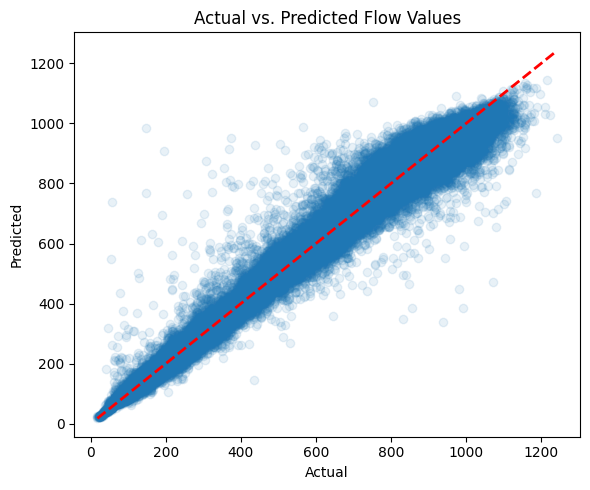

,Predicted flow,Actual flow
Datetime,,
2021-06-21 08:47:00,889.370000,875.0
2021-06-10 06:30:00,902.140000,974.0
2021-08-23 08:51:00,671.483333,623.0
2021-09-14 06:49:00,993.286667,954.0
2021-10-30 06:41:00,209.506667,223.0
...,...,...
2021-06-17 08:40:00,978.786667,1003.0
2021-06-30 05:03:00,749.553333,745.0
2021-11-08 06:29:00,931.413333,898.0


In [ ]:
# Evaluation of prediction test split
evaluate(y_test_flow, y_pred_flow, 'flow')

In [ ]:
# Prediction on the full future dataset
y_pred_eval_flow = flow_RF.predict(eval_X)

--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 44.349
Mean Squared Error: 4270.674
R-squared: 0.948



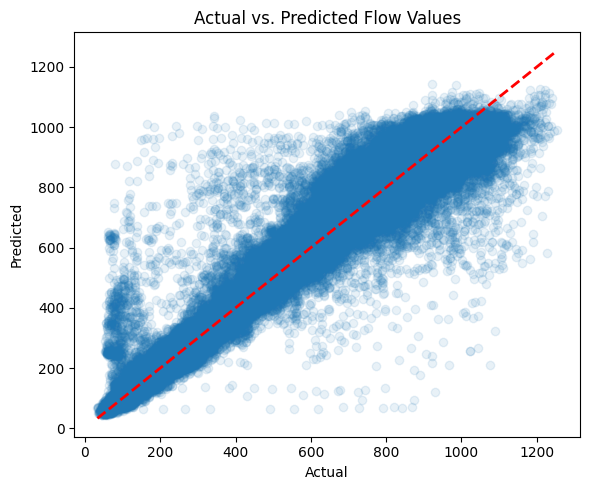

,Predicted flow,Actual flow
Datetime,,
2022-01-05 04:59:00,428.116667,369.0
2022-01-05 05:00:00,391.626667,375.0
2022-01-05 05:01:00,411.066667,380.0
2022-01-05 05:02:00,390.170000,388.0
2022-01-05 05:03:00,401.203333,388.0
...,...,...
2022-06-30 09:40:00,890.196667,939.0
2022-06-30 09:41:00,899.610000,926.0
2022-06-30 09:42:00,888.793333,913.0


In [ ]:
# Evaluation of prediciton on the full future dataset
evaluate(eval_y_flow, y_pred_eval_flow, 'flow')

In [ ]:
# Prediction on the peak hour future dataset
y_pred_peak_eval_flow = flow_RF.predict(peak_eval_X)

--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 45.270
Mean Squared Error: 4570.316
R-squared: 0.932



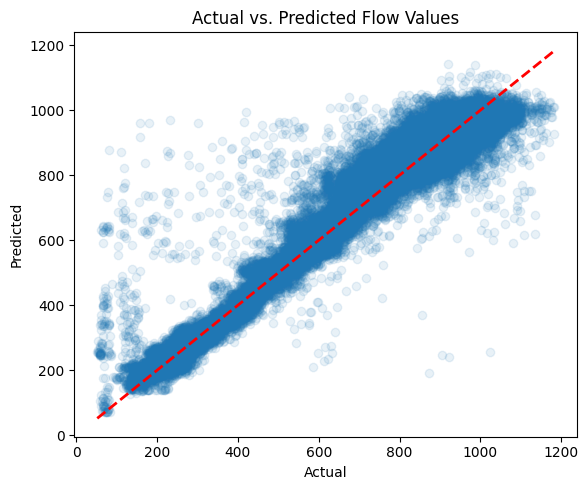

,Predicted flow,Actual flow
Datetime,,
2022-01-05 07:31:00,564.993333,535.0
2022-01-05 07:32:00,584.353333,542.0
2022-01-05 07:33:00,587.876667,532.0
2022-01-05 07:34:00,582.466667,535.0
2022-01-05 07:35:00,571.480000,524.0
...,...,...
2022-06-30 08:26:00,968.083333,919.0
2022-06-30 08:27:00,957.000000,933.0
2022-06-30 08:28:00,924.536667,921.0


In [ ]:
# Evaluation of prediciton on the peak hour future dataset
evaluate(peak_eval_y_flow, y_pred_peak_eval_flow, 'flow')

### Model 2: Univariate Random Forest for speed modeling

In [ ]:
# Train model and make prediction
speed_RF = RandomForestRegressor(random_state=42, n_estimators=300)
speed_RF.fit(X_train_speed, y_train_speed)
y_pred_speed = speed_RF.predict(X_test_speed)

In [ ]:
# Save the trained model
joblib.dump(speed_RF, project_path+'speed_RF.joblib')

['/content/gdrive/MyDrive/Samhällsbyggnadsprogrammet/AH2179/Project/speed_RF.joblib']

In [ ]:
# Check the feature importances
importances = speed_RF.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance*100:.2f}%")

FLOW_SUM: 0.75%
SPEED_WEIGHTED_AVG: 13.16%
FLOW_PREV_5_SUM: 0.95%
FLOW_PREV_15_SUM: 1.29%
FLOW_PREV_60_SUM: 1.93%
SPEED_PREV_5_AVG: 9.19%
SPEED_PREV_15_AVG: 69.12%
SPEED_PREV_60_AVG: 2.47%
IS_WEEKDAY: 0.14%
Interval_30: 1.00%


-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.265
Mean Squared Error: 0.326
R-squared: 0.922



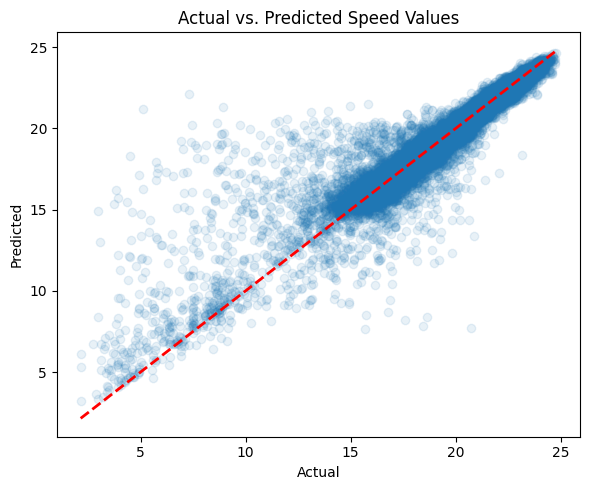

,Predicted speed,Actual speed
Datetime,,
2021-06-21 08:47:00,19.889826,20.106549
2021-06-10 06:30:00,20.331951,20.077793
2021-08-23 08:51:00,20.294843,20.698764
2021-09-14 06:49:00,17.032742,17.487495
2021-10-30 06:41:00,21.903290,21.777713
...,...,...
2021-06-17 08:40:00,14.992534,14.591466
2021-06-30 05:03:00,21.432388,21.753517
2021-11-08 06:29:00,20.192204,20.041281


In [ ]:
# Evaluation of prediction test split
evaluate(y_test_speed, y_pred_speed, 'speed')

In [ ]:
# Prediction on the full future dataset
y_pred_eval_speed = speed_RF.predict(eval_X)

-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.391
Mean Squared Error: 0.737
R-squared: 0.838



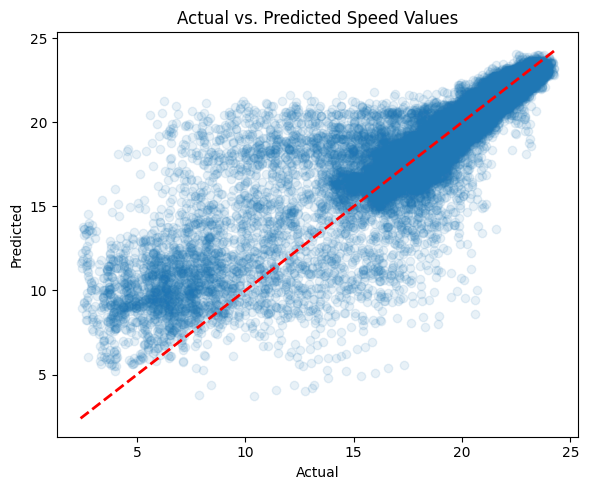

,Predicted speed,Actual speed
Datetime,,
2022-01-05 04:59:00,20.875505,20.985339
2022-01-05 05:00:00,21.230776,20.842053
2022-01-05 05:01:00,21.157755,20.837737
2022-01-05 05:02:00,21.203447,20.910825
2022-01-05 05:03:00,21.141092,20.882010
...,...,...
2022-06-30 09:40:00,20.801820,20.699318
2022-06-30 09:41:00,20.825883,20.710724
2022-06-30 09:42:00,20.850104,20.703297


In [ ]:
# Evaluation of prediciton on the full future dataset
evaluate(eval_y_speed, y_pred_eval_speed, 'speed')

In [ ]:
# Prediction on the peak hour future dataset
y_pred_peak_eval_speed = speed_RF.predict(peak_eval_X)

-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.387
Mean Squared Error: 0.798
R-squared: 0.818



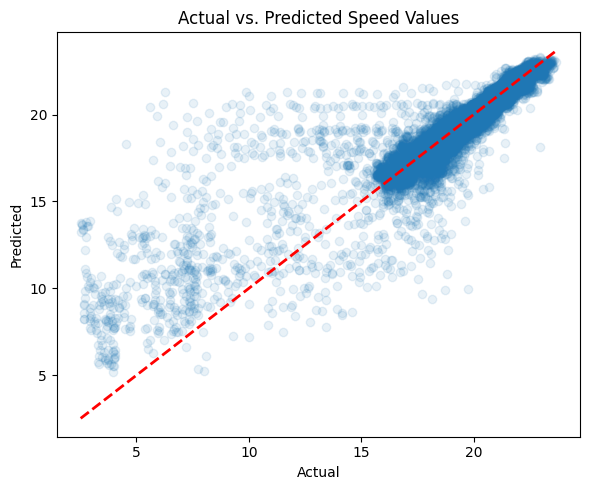

,Predicted speed,Actual speed
Datetime,,
2022-01-05 07:31:00,19.637945,19.667645
2022-01-05 07:32:00,19.569144,19.636033
2022-01-05 07:33:00,19.556554,19.726297
2022-01-05 07:34:00,19.510832,19.648710
2022-01-05 07:35:00,19.501471,19.717195
...,...,...
2022-06-30 08:26:00,21.095917,21.302590
2022-06-30 08:27:00,21.113951,21.347824
2022-06-30 08:28:00,21.100559,21.481379


In [ ]:
# Evaluation of prediciton on the peak hour future dataset
evaluate(peak_eval_y_speed, y_pred_peak_eval_speed, 'speed')

### Model 3: Multivariate Random Forest

In [16]:
# Train model and make prediction
multivariate_RF = RandomForestRegressor(random_state=42, n_estimators=300)
multivariate_RF.fit(X_train_multi, y_train_multi)
y_pred_multi = multivariate_RF.predict(X_test_multi)

In [17]:
# Save the trained model
joblib.dump(multivariate_RF, project_path+'multivariate_RF.joblib')

['/content/gdrive/MyDrive/Samhällsbyggnadsprogrammet/AH2179/Project/multivariate_RF.joblib']

In [18]:
# Check the feature importances
importances = multivariate_RF.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance*100:.2f}%")

FLOW_SUM: 0.38%
SPEED_WEIGHTED_AVG: 0.34%
FLOW_PREV_5_SUM: 9.83%
FLOW_PREV_15_SUM: 84.83%
FLOW_PREV_60_SUM: 1.94%
SPEED_PREV_5_AVG: 0.40%
SPEED_PREV_15_AVG: 0.60%
SPEED_PREV_60_AVG: 0.72%
IS_WEEKDAY: 0.35%
Interval_30: 0.62%


--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 30.092
Mean Squared Error: 1902.512
R-squared: 0.976

-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.312
Mean Squared Error: 0.373
R-squared: 0.911



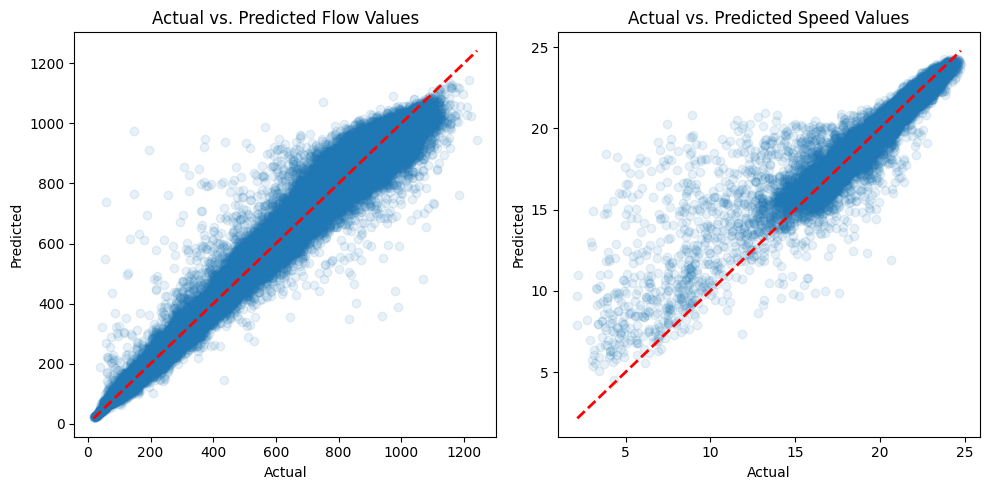

,Predicted flow,Actual flow,Predicted speed,Actual speed
Datetime,,,,
2021-06-21 08:47:00,889.860000,875.0,19.713245,20.106549
2021-06-10 06:30:00,903.800000,974.0,20.330087,20.077793
2021-08-23 08:51:00,673.590000,623.0,20.332633,20.698764
2021-09-14 06:49:00,995.503333,954.0,16.949086,17.487495
2021-10-30 06:41:00,208.793333,223.0,22.112179,21.777713
...,...,...,...,...
2021-06-17 08:40:00,977.290000,1003.0,15.668904,14.591466
2021-06-30 05:03:00,748.803333,745.0,21.474836,21.753517
2021-11-08 06:29:00,928.060000,898.0,20.228779,20.041281


In [24]:
# Evaluation of prediction test split
evaluate(y_test_multi, y_pred_multi, 'multivariate')

In [25]:
# Prediction on the full future dataset
y_pred_eval_multi = multivariate_RF.predict(eval_X)

--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 44.342
Mean Squared Error: 4273.210
R-squared: 0.948

-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.449
Mean Squared Error: 0.988
R-squared: 0.783



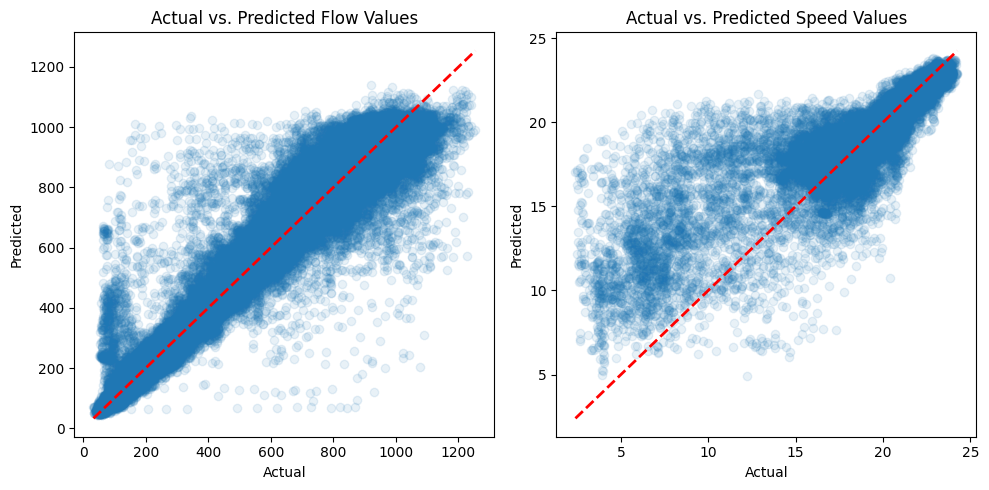

,Predicted flow,Actual flow,Predicted speed,Actual speed
Datetime,,,,
2022-01-05 04:59:00,431.680000,369.0,21.103269,20.985339
2022-01-05 05:00:00,386.780000,375.0,21.602532,20.842053
2022-01-05 05:01:00,411.590000,380.0,21.199606,20.837737
2022-01-05 05:02:00,392.776667,388.0,21.079725,20.910825
2022-01-05 05:03:00,403.950000,388.0,21.120210,20.882010
...,...,...,...,...
2022-06-30 09:40:00,889.156667,939.0,20.754029,20.699318
2022-06-30 09:41:00,899.780000,926.0,20.725083,20.710724
2022-06-30 09:42:00,888.223333,913.0,20.820346,20.703297


In [26]:
# Evaluation of prediciton on the full future dataset
evaluate(eval_y_multi, y_pred_eval_multi, 'multivariate')

In [27]:
# Prediction on the peak hour future dataset
y_pred_peak_eval_multi = multivariate_RF.predict(peak_eval_X)

--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 45.269
Mean Squared Error: 4585.035
R-squared: 0.932

-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.444
Mean Squared Error: 1.007
R-squared: 0.771



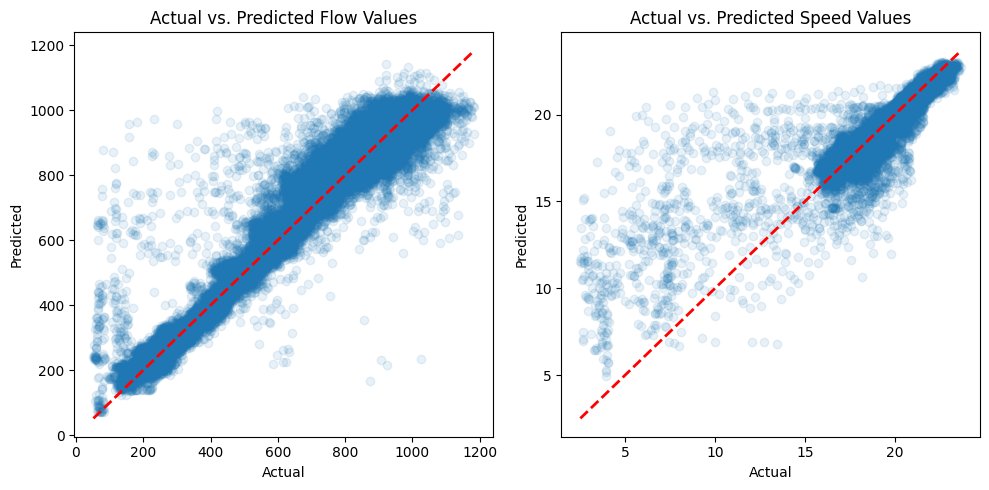

,Predicted flow,Actual flow,Predicted speed,Actual speed
Datetime,,,,
2022-01-05 07:31:00,563.753333,535.0,19.659254,19.667645
2022-01-05 07:32:00,587.640000,542.0,19.600279,19.636033
2022-01-05 07:33:00,589.826667,532.0,19.525930,19.726297
2022-01-05 07:34:00,584.436667,535.0,19.486472,19.648710
2022-01-05 07:35:00,574.663333,524.0,19.587681,19.717195
...,...,...,...,...
2022-06-30 08:26:00,969.973333,919.0,20.913282,21.302590
2022-06-30 08:27:00,960.180000,933.0,20.835715,21.347824
2022-06-30 08:28:00,926.963333,921.0,20.783069,21.481379


In [29]:
# Evaluation of prediciton on the peak hour future dataset
evaluate(peak_eval_y_multi, y_pred_peak_eval_multi, 'multivariate')

### Model 4: Univariate Neural Network for flow modeling

In [ ]:
scaler_x = MinMaxScaler()
X_train_flow = scaler_x.fit_transform(X_train_flow)
X_test_flow = scaler_x.transform(X_test_flow)

In [ ]:
eval_X = scaler_x.transform(eval_X)
peak_eval_X = scaler_x.transform(peak_eval_X)

In [ ]:
# Load the trained model
best_NN_flow = load_model(project_path+'best_univar_NN_flow.keras')

In [ ]:
# Prediction on the full future dataset
y_pred_eval_flow = best_NN_flow.predict(eval_X)

6170/6170 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 42.290
Mean Squared Error: 3843.753
R-squared: 0.954



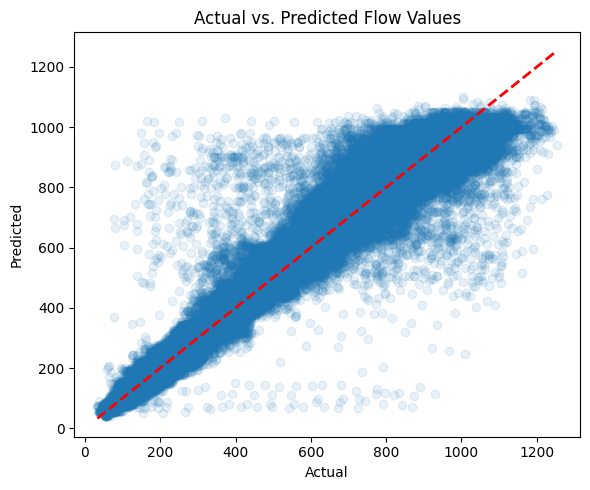

,Predicted flow,Actual flow
Datetime,,
2022-01-05 04:59:00,335.815857,369.0
2022-01-05 05:00:00,414.591583,375.0
2022-01-05 05:01:00,411.348175,380.0
2022-01-05 05:02:00,421.916962,388.0
2022-01-05 05:03:00,435.485626,388.0
...,...,...
2022-06-30 09:40:00,852.388977,939.0
2022-06-30 09:41:00,860.634644,926.0
2022-06-30 09:42:00,860.321716,913.0


In [ ]:
# Evaluation of prediciton on the full future dataset
evaluate(eval_y_flow, y_pred_eval_flow, 'flow')

In [ ]:
# Prediction on the peak hour future dataset
y_pred_peak_eval_flow = best_NN_flow.predict(peak_eval_X)

1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 42.738
Mean Squared Error: 4029.593
R-squared: 0.940



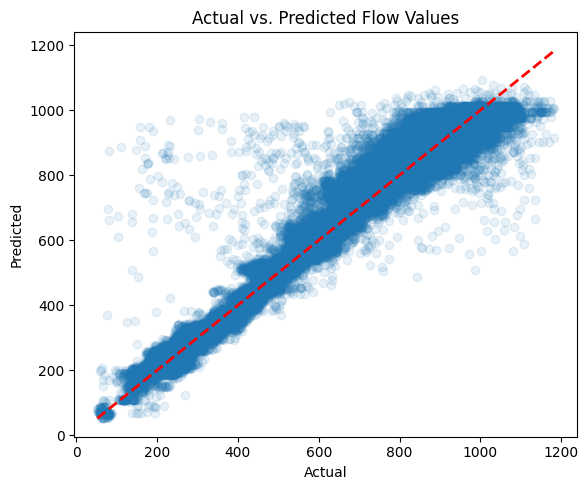

,Predicted flow,Actual flow
Datetime,,
2022-01-05 07:31:00,593.065063,535.0
2022-01-05 07:32:00,599.180359,542.0
2022-01-05 07:33:00,612.430359,532.0
2022-01-05 07:34:00,603.108765,535.0
2022-01-05 07:35:00,605.056580,524.0
...,...,...
2022-06-30 08:26:00,973.320740,919.0
2022-06-30 08:27:00,948.761230,933.0
2022-06-30 08:28:00,975.872009,921.0


In [ ]:
# Evaluation of prediciton on the peak hour future dataset
evaluate(peak_eval_y_flow, y_pred_peak_eval_flow, 'flow')

### Model 5: Univariate Neural Network for speed modeling

In [ ]:
scaler_x = MinMaxScaler()
X_train_speed = scaler_x.fit_transform(X_train_speed)
X_test_speed = scaler_x.transform(X_test_speed)

In [ ]:
eval_X = scaler_x.transform(eval_X)
peak_eval_X = scaler_x.transform(peak_eval_X)

In [ ]:
# Load the trained model
best_NN_speed = load_model(project_path+'best_univar_NN_speed.keras')

In [ ]:
# Prediction on the full future dataset
y_pred_eval_speed = best_NN_speed.predict(eval_X)

6170/6170 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.369
Mean Squared Error: 0.709
R-squared: 0.844



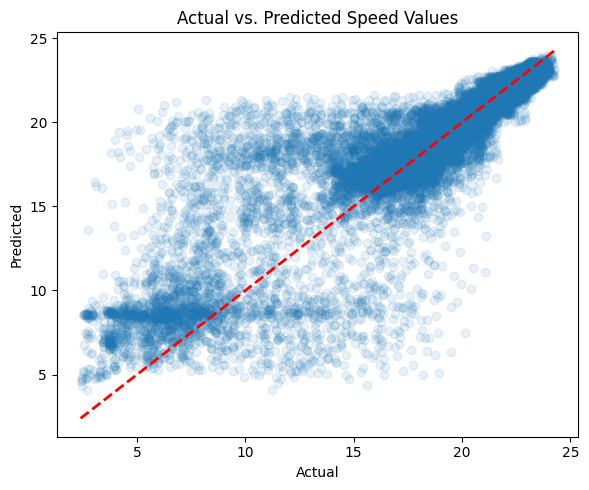

,Predicted speed,Actual speed
Datetime,,
2022-01-05 04:59:00,21.096556,20.985339
2022-01-05 05:00:00,21.391443,20.842053
2022-01-05 05:01:00,21.291210,20.837737
2022-01-05 05:02:00,21.215277,20.910825
2022-01-05 05:03:00,21.209309,20.882010
...,...,...
2022-06-30 09:40:00,21.058168,20.699318
2022-06-30 09:41:00,20.993174,20.710724
2022-06-30 09:42:00,20.982372,20.703297


In [ ]:
# Evaluation of prediciton on the full future dataset
evaluate(eval_y_speed, y_pred_eval_speed, 'speed')

In [ ]:
# Prediction on the peak hour future dataset
y_pred_peak_eval_speed = best_NN_speed.predict(peak_eval_X)

1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.364
Mean Squared Error: 0.744
R-squared: 0.831



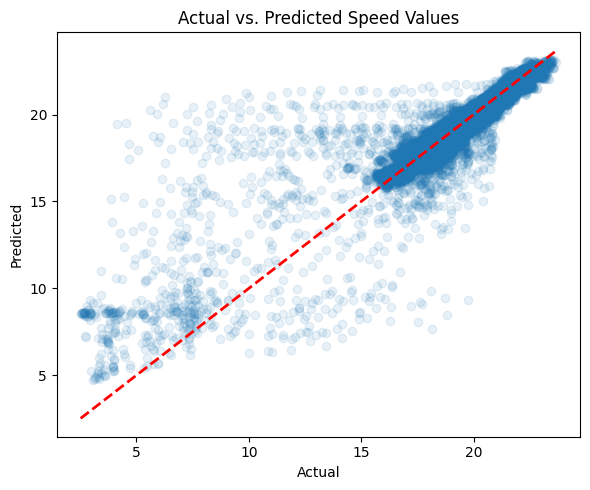

,Predicted speed,Actual speed
Datetime,,
2022-01-05 07:31:00,19.631697,19.667645
2022-01-05 07:32:00,19.567595,19.636033
2022-01-05 07:33:00,19.523024,19.726297
2022-01-05 07:34:00,19.499685,19.648710
2022-01-05 07:35:00,19.494522,19.717195
...,...,...
2022-06-30 08:26:00,21.130297,21.302590
2022-06-30 08:27:00,21.135935,21.347824
2022-06-30 08:28:00,21.071264,21.481379


In [ ]:
# Evaluation of prediciton on the peak hour future dataset
evaluate(peak_eval_y_speed, y_pred_peak_eval_speed, 'speed')

### Model 6: Multivariate Neural Network

In [ ]:
scaler_x = MinMaxScaler()
X_train_multi = scaler_x.fit_transform(X_train_multi)
X_test_multi = scaler_x.transform(X_test_multi)

scaler_y = StandardScaler()
y_train_multi = scaler_y.fit_transform(y_train_multi)
y_test_multi = scaler_y.transform(y_test_multi)

In [ ]:
eval_X = scaler_x.transform(eval_X)
peak_eval_X = scaler_x.transform(peak_eval_X)
eval_y_multi  = scaler_y.transform(eval_y_multi)
peak_eval_y_multi = scaler_y.transform(peak_eval_y_multi)

In [ ]:
# Load the trained model
best_NN_multi = load_model(project_path+'best_multivar_NN.keras')

In [ ]:
# Prediction on the full future dataset
y_pred_eval_multi = best_NN_multi.predict(eval_X)

6170/6170 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 0.148
Mean Squared Error: 0.050
R-squared: 0.951

-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.179
Mean Squared Error: 0.195
R-squared: 0.820



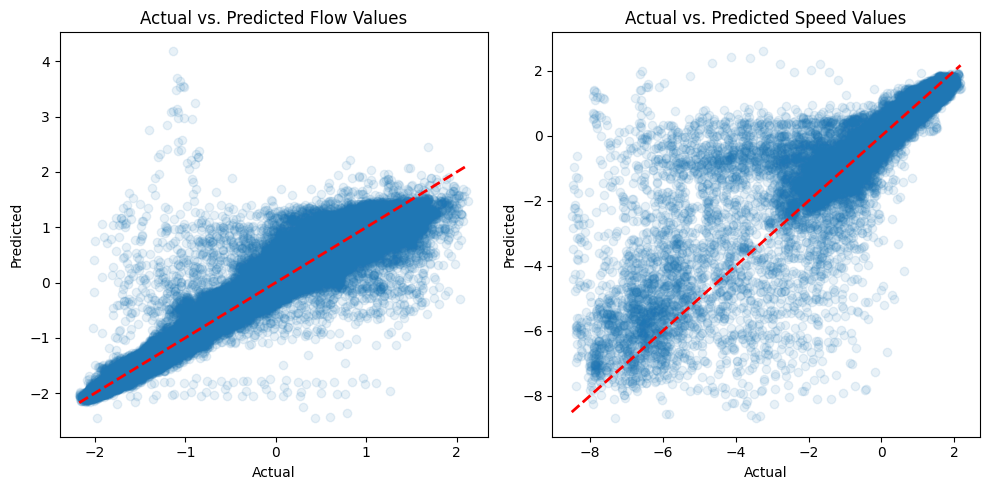

In [ ]:
# Evaluation of prediciton on the full future dataset
evaluate(eval_y_multi, y_pred_eval_multi, 'multivariate')

In [ ]:
# Prediction on the peak hour future dataset
y_pred_peak_eval_multi = best_NN_multi.predict(peak_eval_X)

1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


--------------------------------------- Flow evaluation metrics --------------------------------------
Mean Absolute Error: 0.149
Mean Squared Error: 0.049
R-squared: 0.941

-------------------------------------- Speed evaluation metrics --------------------------------------
Mean Absolute Error: 0.178
Mean Squared Error: 0.202
R-squared: 0.807



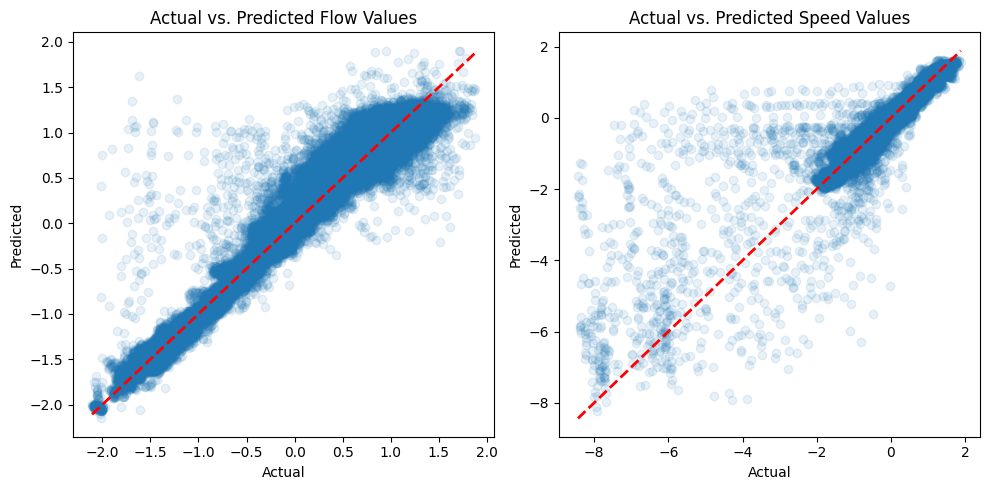

In [ ]:
# Evaluation of prediciton on the peak hour future dataset
evaluate(peak_eval_y_multi, y_pred_peak_eval_multi, 'multivariate')